In [ ]:
# kaggle data 
# https://www.kaggle.com/datasets/arjunbhasin2013/ccdata
# customer segmentation on credit cards 



# !pip uninstall sklearn
# !pip install scikit-learn
# !pip install dora 

In [1]:
import pandas as pd 
import numpy as np
import sweetviz as sv
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.mixture import GaussianMixture # was not working for an error: underflow .. couldn't solve it. 
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score


# from Dora import Dora

In [2]:
df = pd.read_csv("./Credit_Card_Dataset_for_Clustering/CC_GENERAL.csv")
# df.head(10)
# df.describe()
df.shape

(8950, 18)

# Data cleaning
1. handling duplicates
2. dropping IID columns 
3. typos and misspelling 
4. --- univariate anlaysis --- 
5. missing values. 


comparison between automated data cleaning using DORA and manual data cleaning. 

1. handling duplicates

In [3]:
pre11 = df.copy()
print(pre11.shape)
# Cust ID drop column 
pre11 = pre11.drop('CUST_ID', axis=1)

# drop duplicates
pre11.drop_duplicates()
pre11.shape

# no duplicates found

(8950, 18)


(8950, 17)

2. dropping IID columns

In [4]:
pre12 = pre11.copy()
pre12.columns
# no IID columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

3. typos and misspelling 


In [5]:
pre13 = pre12.copy()
print(np.sort(pre13['BALANCE'].unique()))
print(np.sort(pre13['BALANCE_FREQUENCY'].unique()))
print(np.sort(pre13['TENURE'].unique()))


[0.00000000e+00 1.99000000e-04 1.14600000e-03 ... 1.63048893e+04
 1.84955586e+04 1.90431386e+04]
[0.       0.090909 0.1      0.111111 0.125    0.142857 0.166667 0.181818
 0.2      0.222222 0.25     0.272727 0.285714 0.3      0.333333 0.363636
 0.375    0.4      0.428571 0.444444 0.454545 0.5      0.545455 0.555556
 0.571429 0.6      0.625    0.636364 0.666667 0.7      0.714286 0.727273
 0.75     0.777778 0.8      0.818182 0.833333 0.857143 0.875    0.888889
 0.9      0.909091 1.      ]
[ 6  7  8  9 10 11 12]


4. -- univariate anlaysis -- 

In [ ]:
pre14 = pre13.copy()
analyze_report  = sv.analyze(pre14)
analyze_report.show_html('CreditCard_Analysis.html', open_browser=False)


In [7]:
pre14.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

5. missing values.


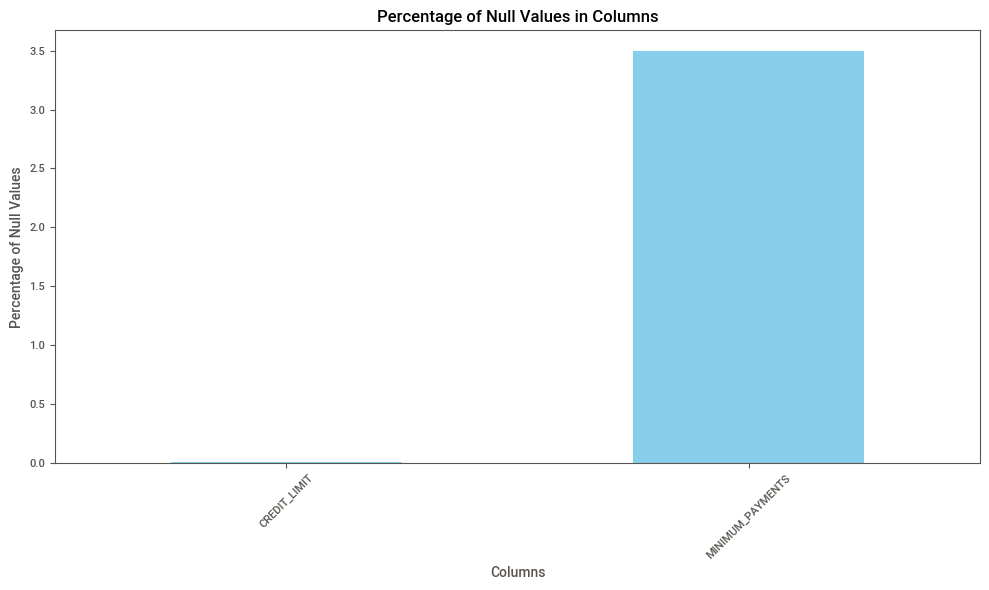

In [8]:
pre15 = pre14.copy()
pre15.isnull().sum()

# Step 1: Calculate the percentage of null values for each column
null_percentage = pre15.isnull().mean() * 100

# Step 2: Filter columns with null values
null_columns = null_percentage[null_percentage > 0]

# Step 3: Plot the percentage of null values
plt.figure(figsize=(10, 6))
null_columns.plot(kind='bar', color='skyblue')
plt.xlabel('Columns')
plt.ylabel('Percentage of Null Values')
plt.title('Percentage of Null Values in Columns')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# since the whole total null values is around 3% of the whole data 
# ... then we can just drop such rows. and our dataset won't be affected 

In [9]:
print(pre15.shape)
pre15 = pre15.dropna()
print(pre15.shape)

(8950, 17)
(8636, 17)


# Data preprocessing (preparation) 
- define first how many categorical and numerical columns. 

1. Categorical features encoding:
2. numerical features (z scaling) 
3. dimensionality reduction (t-sne, pca)

In [10]:
# defining the numerical and categorical features. 

numerical_features = pre15.select_dtypes(include=['number'])
categorical_features = pre15.select_dtypes(include=['object', 'category'])

# print(f'Number of numerical features:', len(numerical_features))
print(f'Number of numerical  features: {numerical_features.shape[1]}')
print(f'Number of categorical features: {categorical_features.shape[1]}')


Number of numerical  features: 17
Number of categorical features: 0


1. Categorical Features. <br>
no categorical features to deal with

2. numerical features scaling

In [11]:
pre22 = pre15.copy()

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply Z-scaling to all features (assuming all columns are numerical)
pre22[:] = scaler.fit_transform(pre22)

# Check the first few rows of the scaled DataFrame
print(pre22.head())

    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.744625          -0.370047  -0.429184         -0.359160   
1  0.764152           0.067679  -0.473208         -0.359160   
2  0.426602           0.505405  -0.116413          0.099909   
4 -0.373910           0.505405  -0.465825         -0.349660   
5  0.099551           0.505405   0.142062         -0.359160   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.354826     -0.468655            -0.820769   
1               -0.458839      2.568556            -1.236139   
2               -0.458839     -0.468655             1.256077   
4               -0.458839     -0.468655            -1.028455   
5                0.994815     -0.468655             0.425339   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.686280                         -0.717179   
1                   -0.686280                         -0.926522   
2                    2.646651      

C:\Users\monee\AppData\Local\Temp\ipykernel_17276\2515584003.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.47943688  0.09925796 -0.47943688 ... -0.47943688 -0.19008946
 -0.19008946]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  pre22[:] = scaler.fit_transform(pre22)
C:\Users\monee\AppData\Local\Temp\ipykernel_17276\2515584003.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.51762292 -0.59705416 -0.12046673 ... -0.39847606 -0.59705416
  0.31640509]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  pre22[:] = scaler.fit_transform(pre22)
C:\Users\monee\AppData\Local\Temp\ipykernel_17276\2515584003.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.35518066  0.35518066  0.3

3. dimensionality reduction <br> 
Since, t-sne is better for visualization. <br>
Moreover, t-sne considers non-linear relationships as well. <br>
Thus, lets consider t-sne in this stage. 

C:\Users\monee\AppData\Local\Temp\ipykernel_17276\2199499273.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pre23_tsne[:, 0], pre23_tsne[:, 1], s=50, cmap='viridis')


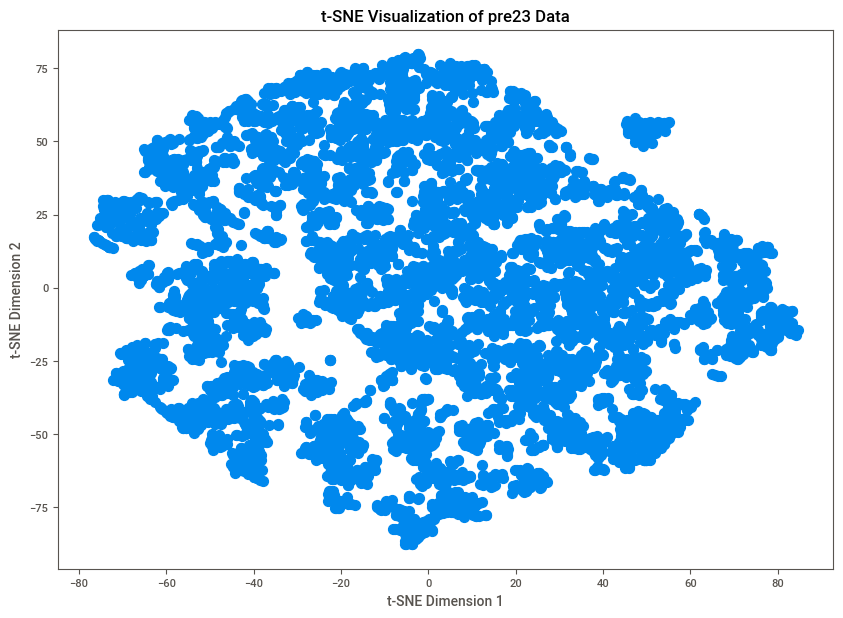

In [12]:
#t-sne 
pre23 = pre22.copy()
# Import necessary libraries

# Standardizing the features (this is important for t-SNE)
scaler = StandardScaler()
pre23_scaled = scaler.fit_transform(pre23)

# Applying t-SNE (reducing to 2 dimensions for visualization)
tsne = TSNE(n_components=2, random_state=42)
pre23_tsne = tsne.fit_transform(pre23_scaled)

# Plotting the results in 2D
plt.figure(figsize=(10, 7))
plt.scatter(pre23_tsne[:, 0], pre23_tsne[:, 1], s=50, cmap='viridis')
plt.title('t-SNE Visualization of pre23 Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


Interactive 3D plotly graph 

In [15]:
import plotly.graph_objs as go
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# Standardizing the features
scaler = StandardScaler()
pre23_scaled = scaler.fit_transform(pre23)

# Applying t-SNE (reducing to 3 dimensions for 3D visualization)
tsne = TSNE(n_components=3, random_state=42)
pre23_tsne_3d = tsne.fit_transform(pre23_scaled)

# Creating a 3D scatter plot using Plotly
fig = go.Figure(data=[go.Scatter3d(
    x=pre23_tsne_3d[:, 0], 
    y=pre23_tsne_3d[:, 1], 
    z=pre23_tsne_3d[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=pre23_tsne_3d[:, 2],  # Coloring based on z-axis values
        colorscale='Viridis',
        opacity=0.8
    )
)])

# Adding title and axis labels
fig.update_layout(
    title='3D t-SNE Visualization of pre23 Data',
    scene=dict(
        xaxis_title='t-SNE Dimension 1',
        yaxis_title='t-SNE Dimension 2',
        zaxis_title='t-SNE Dimension 3'
    )
)

# Show interactive plot
fig.show()



C:\Users\monee\AppData\Local\Temp\ipykernel_3420\1102422249.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scat = ax.scatter(pre23_tsne_3d[:, 0], pre23_tsne_3d[:, 1], pre23_tsne_3d[:, 2],


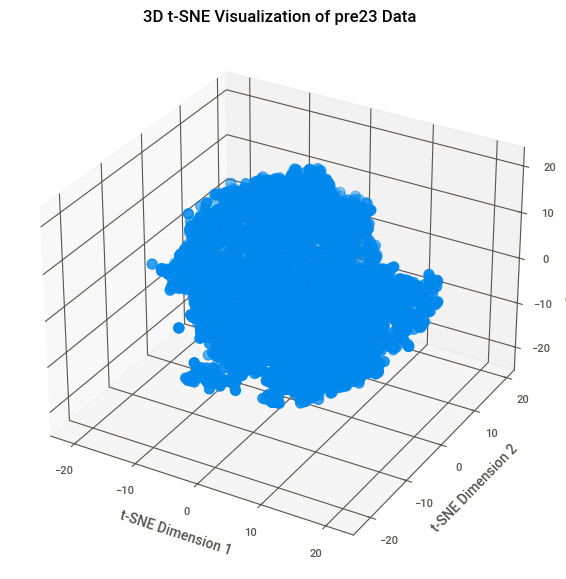

In [15]:
#3d t-sne

# Standardizing the features
scaler = StandardScaler()
pre23_scaled = scaler.fit_transform(pre23)

# Applying t-SNE (reducing to 3 dimensions for 3D visualization)
tsne = TSNE(n_components=3, random_state=42)
pre23_tsne_3d = tsne.fit_transform(pre23_scaled)

# Plotting the results in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot in 3D
scat = ax.scatter(pre23_tsne_3d[:, 0], pre23_tsne_3d[:, 1], pre23_tsne_3d[:, 2], 
                  s=50, cmap='viridis')

# Setting the labels
ax.set_title('3D t-SNE Visualization of pre23 Data')
ax.set_xlabel('t-SNE Dimension 1')
ax.set_ylabel('t-SNE Dimension 2')
ax.set_zlabel('t-SNE Dimension 3')

# Show plot 
plt.show()  


# 3 Clustering techniques: 

1. defining the number of clusters needed using elbow method. 
2. use K-means clustering technique. 

## elbow method

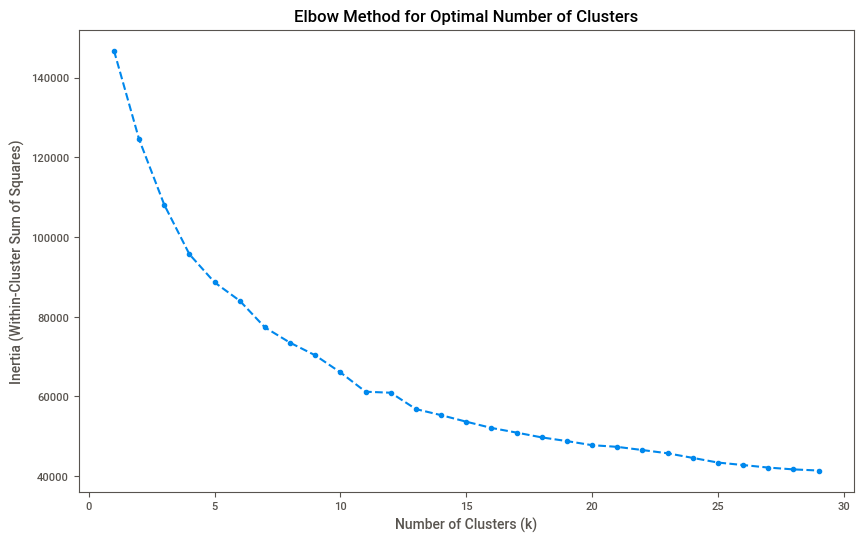

In [19]:
# elbow 

# Standardize the data
scaler = StandardScaler()
pre23_scaled = scaler.fit_transform(pre23)

# Apply the Elbow Method to determine the optimal number of clusters
inertia = []  # This will hold the within-cluster sum of squared distances for each k

# Testing different numbers of clusters (for example, from 1 to 10)
for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pre23_scaled)
    inertia.append(kmeans.inertia_)  # Inertia is the within-cluster sum of squares

# Plotting the results (the elbow curve)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 30), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.show()

I believe the value 11 would be a good clustering K value. 

K-means clustering technique

In [16]:
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import numpy as np

# Standardizing the features
scaler = StandardScaler()
pre23_scaled = scaler.fit_transform(pre23)

# Step 2: Apply K-Means clustering with 11 clusters
kmeans = KMeans(n_clusters=11, random_state=42)
pre23['Cluster'] = kmeans.fit_predict(pre23_scaled)

# Apply t-SNE for 3D visualization
tsne = TSNE(n_components=3, random_state=42)
pre23_tsne_3d = tsne.fit_transform(pre23_scaled)

# Getting the cluster centroids
centroids = kmeans.cluster_centers_

# Since t-SNE was applied to pre23 data, we calculate the centroid positions in the t-SNE space
centroids_tsne_3d = []
for i in range(11):  # Loop over each cluster
    centroids_tsne_3d.append(pre23_tsne_3d[pre23['Cluster'] == i].mean(axis=0))
centroids_tsne_3d = np.array(centroids_tsne_3d)

# Step 4: Visualize the clusters in 3D interactively with Plotly
fig = go.Figure()

# Scatter plot for the data points in t-SNE space, colored by cluster labels
fig.add_trace(go.Scatter3d(
    x=pre23_tsne_3d[:, 0], 
    y=pre23_tsne_3d[:, 1], 
    z=pre23_tsne_3d[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=pre23['Cluster'],  # Color based on cluster labels
        colorscale='Viridis',
        opacity=0.8
    ),
    name='Data Points'
))

# Scatter plot for centroids
fig.add_trace(go.Scatter3d(
    x=centroids_tsne_3d[:, 0], 
    y=centroids_tsne_3d[:, 1], 
    z=centroids_tsne_3d[:, 2],
    mode='markers',
    marker=dict(
        size=10,
        color='red',
        symbol='x',
        opacity=1.0
    ),
    name='Centroids'
))

# Update layout with title and axis labels
fig.update_layout(
    title='K-means Clustering Visualized in 3D (t-SNE)',
    scene=dict(
        xaxis_title='t-SNE Dimension 1',
        yaxis_title='t-SNE Dimension 2',
        zaxis_title='t-SNE Dimension 3'
    )
)

# Show the interactive plot
fig.show()


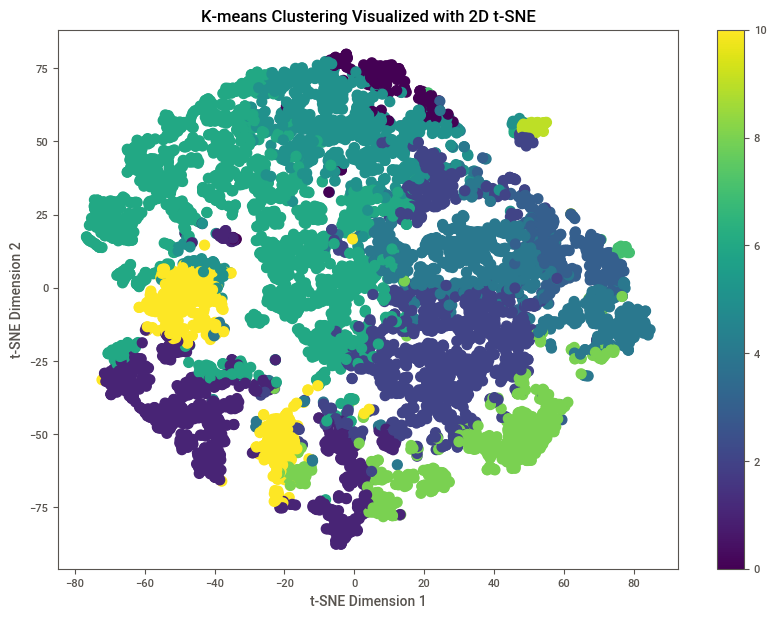

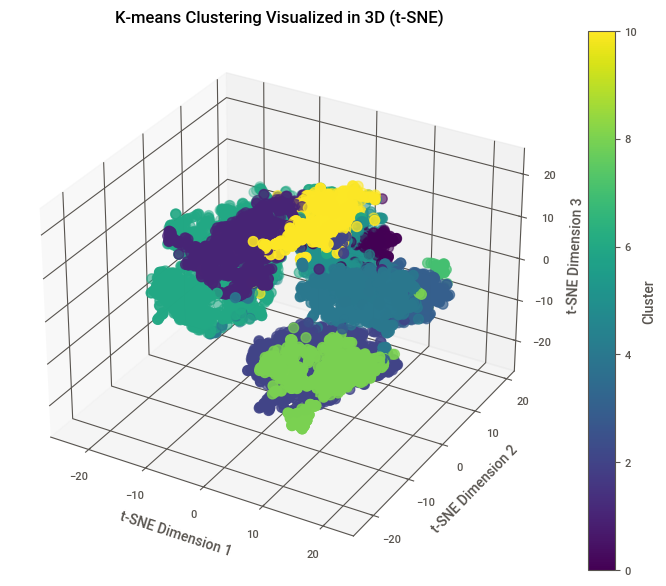

In [34]:
# Step 2: Apply K-Means clustering
# For example, let's assume you choose 5 clusters (you can adjust based on elbow method)
kmeans = KMeans(n_clusters=11, random_state=42)
pre23['Cluster'] = kmeans.fit_predict(pre23_scaled)


# Alternatively, for a 2D scatter plot (if you applied PCA or t-SNE previously)
plt.figure(figsize=(10, 7))
plt.scatter(pre23_tsne[:, 0], pre23_tsne[:, 1], c=pre23['Cluster'], cmap='viridis', s=50)
plt.title('K-means Clustering Visualized with 2D t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar()
plt.show()

# Step 4: Visualize the clusters in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot in 3D
scatter = ax.scatter(pre23_tsne_3d[:, 0], pre23_tsne_3d[:, 1], pre23_tsne_3d[:, 2],
                     c=pre23['Cluster'], cmap='viridis', s=50)

# Setting labels and title
ax.set_title('K-means Clustering Visualized in 3D (t-SNE)')
ax.set_xlabel('t-SNE Dimension 1')
ax.set_ylabel('t-SNE Dimension 2')
ax.set_zlabel('t-SNE Dimension 3')

# Show color bar
plt.colorbar(scatter, ax=ax, label='Cluster')

# Show plot
plt.show()

Heirarchical clustering 

In [18]:
import plotly.graph_objs as go
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import cdist

# Step 1: Standardize the data
scaler = StandardScaler()
pre23_scaled = scaler.fit_transform(pre23)

# Step 2: Apply Hierarchical Clustering
# Create linkage matrix
linkage_matrix = linkage(pre23_scaled, method='ward')

# Step 3: Generate clusters from the hierarchical clustering
n_clusters = 11
pre23['Cluster'] = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

# Step 4: Apply t-SNE for dimensionality reduction to 3D
tsne = TSNE(n_components=3, random_state=42)
pre23_tsne_3d = tsne.fit_transform(pre23_scaled)

# Step 5: Calculate the centroids of the clusters in the t-SNE space
centroids_tsne_3d = []
for cluster in range(1, n_clusters + 1):
    cluster_points = pre23_tsne_3d[pre23['Cluster'] == cluster]
    centroid = cluster_points.mean(axis=0)
    centroids_tsne_3d.append(centroid)
centroids_tsne_3d = np.array(centroids_tsne_3d)

# Step 6: Visualize the clusters in 3D interactively with Plotly
fig = go.Figure()

# Scatter plot for the data points in t-SNE space, colored by cluster labels
fig.add_trace(go.Scatter3d(
    x=pre23_tsne_3d[:, 0], 
    y=pre23_tsne_3d[:, 1], 
    z=pre23_tsne_3d[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=pre23['Cluster'],  # Color based on cluster labels
        colorscale='Viridis',
        opacity=0.8
    ),
    name='Data Points'
))

# Scatter plot for centroids
fig.add_trace(go.Scatter3d(
    x=centroids_tsne_3d[:, 0], 
    y=centroids_tsne_3d[:, 1], 
    z=centroids_tsne_3d[:, 2],
    mode='markers',
    marker=dict(
        size=10,
        color='red',
        symbol='x',
        opacity=1.0
    ),
    name='Centroids'
))

# Update layout with title and axis labels
fig.update_layout(
    title='Hierarchical Clustering Visualized in 3D (t-SNE)',
    scene=dict(
        xaxis_title='t-SNE Dimension 1',
        yaxis_title='t-SNE Dimension 2',
        zaxis_title='t-SNE Dimension 3'
    )
)

# Show the interactive plot
fig.show()


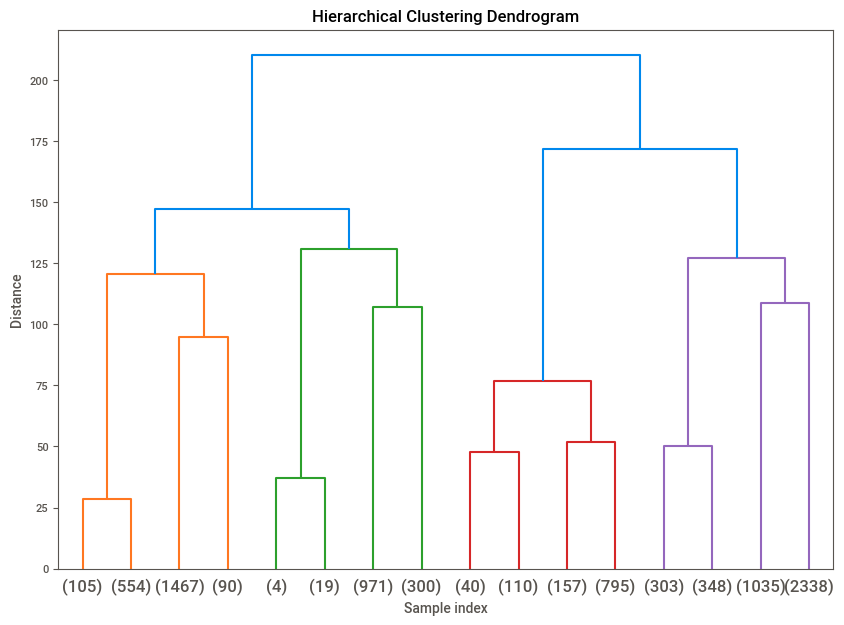

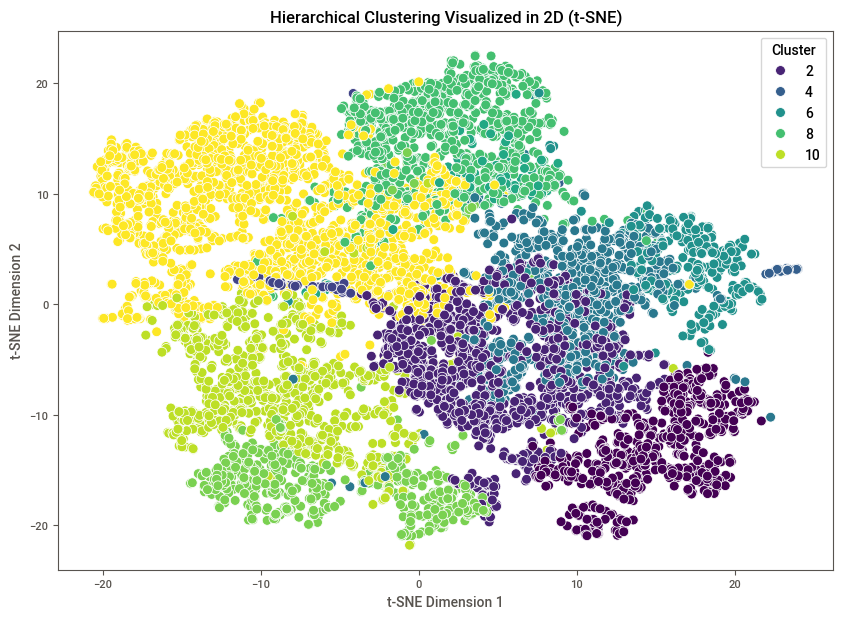

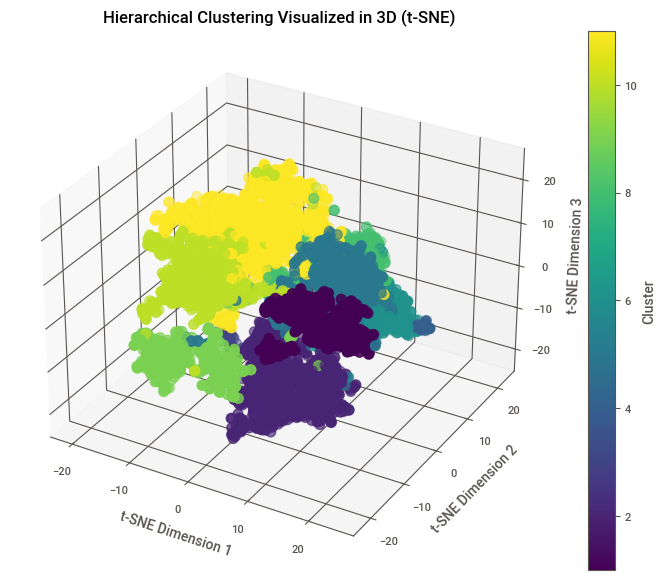

In [23]:
# Step 1: Standardize the data
scaler = StandardScaler()
pre23_scaled = scaler.fit_transform(pre23)

# Step 2: Apply Hierarchical Clustering
# Create linkage matrix
linkage_matrix = linkage(pre23_scaled, method='ward')

# Step 3: Generate clusters from the hierarchical clustering
# You can choose the number of clusters, for example, 5
n_clusters = 11
pre23['Cluster'] = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

# Step 4: Visualize the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode='level', p=3)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Step 5: Apply t-SNE for dimensionality reduction to 2D and 3D
tsne = TSNE(n_components=3, random_state=42)
pre23_tsne_3d = tsne.fit_transform(pre23_scaled)

# Step 6: Visualize the clusters in 2D
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pre23_tsne_3d[:, 0], y=pre23_tsne_3d[:, 1], hue=pre23['Cluster'], palette='viridis', s=50)
plt.title('Hierarchical Clustering Visualized in 2D (t-SNE)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='Cluster')
plt.show()

# Step 7: Visualize the clusters in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot in 3D
scatter = ax.scatter(pre23_tsne_3d[:, 0], pre23_tsne_3d[:, 1], pre23_tsne_3d[:, 2],
                     c=pre23['Cluster'], cmap='viridis', s=50)

# Setting labels and title
ax.set_title('Hierarchical Clustering Visualized in 3D (t-SNE)')
ax.set_xlabel('t-SNE Dimension 1')
ax.set_ylabel('t-SNE Dimension 2')
ax.set_zlabel('t-SNE Dimension 3')

# Show color bar
plt.colorbar(scatter, ax=ax, label='Cluster')

# Show plot
plt.show()


K-means++ 

In [21]:
import plotly.graph_objs as go
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Standardize the data
scaler = StandardScaler()
pre23_scaled = scaler.fit_transform(pre23)

# Step 2: Apply K-Means++ clustering
n_clusters = 11  # Choose the number of clusters
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
pre23['Cluster'] = kmeans.fit_predict(pre23_scaled)

# Step 3: Apply t-SNE for dimensionality reduction to 3D
tsne = TSNE(n_components=3, random_state=42)
pre23_tsne_3d = tsne.fit_transform(pre23_scaled)

# Step 4: Apply t-SNE to centroids with lower perplexity (less than number of centroids)
tsne_for_centroids = TSNE(n_components=3, perplexity=5, random_state=42)
centroids_tsne_3d = tsne_for_centroids.fit_transform(centroids)


# Apply t-SNE to centroids to visualize them in the same 3D space
# centroids_tsne_3d = tsne.fit_transform(centroids)

# Step 5: Visualize the clusters and centroids in 3D interactively with Plotly
fig = go.Figure()

# Scatter plot for the data points in t-SNE space, colored by cluster labels
fig.add_trace(go.Scatter3d(
    x=pre23_tsne_3d[:, 0], 
    y=pre23_tsne_3d[:, 1], 
    z=pre23_tsne_3d[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=pre23['Cluster'],  # Color based on cluster labels
        colorscale='Viridis',
        opacity=0.8
    ),
    name='Data Points'
))

# Scatter plot for centroids
fig.add_trace(go.Scatter3d(
    x=centroids_tsne_3d[:, 0], 
    y=centroids_tsne_3d[:, 1], 
    z=centroids_tsne_3d[:, 2],
    mode='markers',
    marker=dict(
        size=10,
        color='red',
        symbol='x',
        opacity=1.0
    ),
    name='Centroids'
))

# Update layout with title and axis labels
fig.update_layout(
    title='K-Means++ Clustering Visualized in 3D (t-SNE)',
    scene=dict(
        xaxis_title='t-SNE Dimension 1',
        yaxis_title='t-SNE Dimension 2',
        zaxis_title='t-SNE Dimension 3'
    )
)

# Show the interactive plot
fig.show()


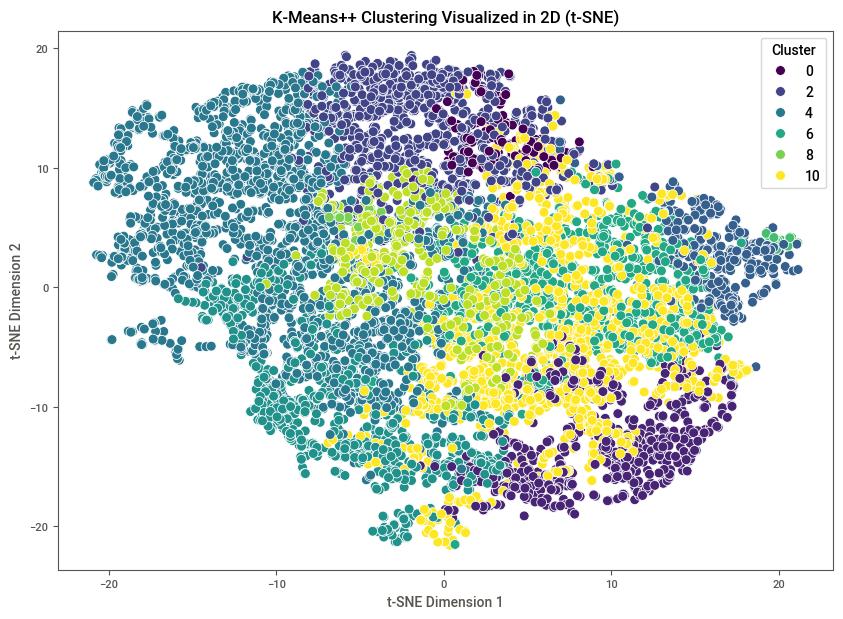

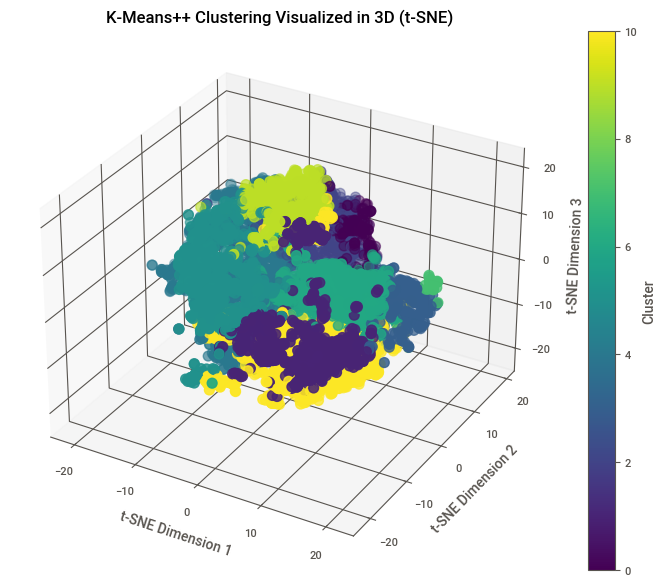

In [17]:
# Step 2: Apply K-Means++ clustering
n_clusters = 11  # Choose the number of clusters
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
pre23['Cluster'] = kmeans.fit_predict(pre23_scaled)

# Step 3: Apply t-SNE for dimensionality reduction to 2D and 3D
tsne = TSNE(n_components=3, random_state=42)
pre23_tsne_3d = tsne.fit_transform(pre23_scaled)

# Step 4: Visualize the clusters in 2D
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pre23_tsne_3d[:, 0], y=pre23_tsne_3d[:, 1], hue=pre23['Cluster'], palette='viridis', s=50)
plt.title('K-Means++ Clustering Visualized in 2D (t-SNE)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='Cluster')
plt.show()

# Step 5: Visualize the clusters in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot in 3D
scatter = ax.scatter(pre23_tsne_3d[:, 0], pre23_tsne_3d[:, 1], pre23_tsne_3d[:, 2],
                     c=pre23['Cluster'], cmap='viridis', s=50)

# Setting labels and title
ax.set_title('K-Means++ Clustering Visualized in 3D (t-SNE)')
ax.set_xlabel('t-SNE Dimension 1')
ax.set_ylabel('t-SNE Dimension 2')
ax.set_zlabel('t-SNE Dimension 3')

# Show color bar
plt.colorbar(scatter, ax=ax, label='Cluster')

# Show plot
plt.show()


3D output comparison 

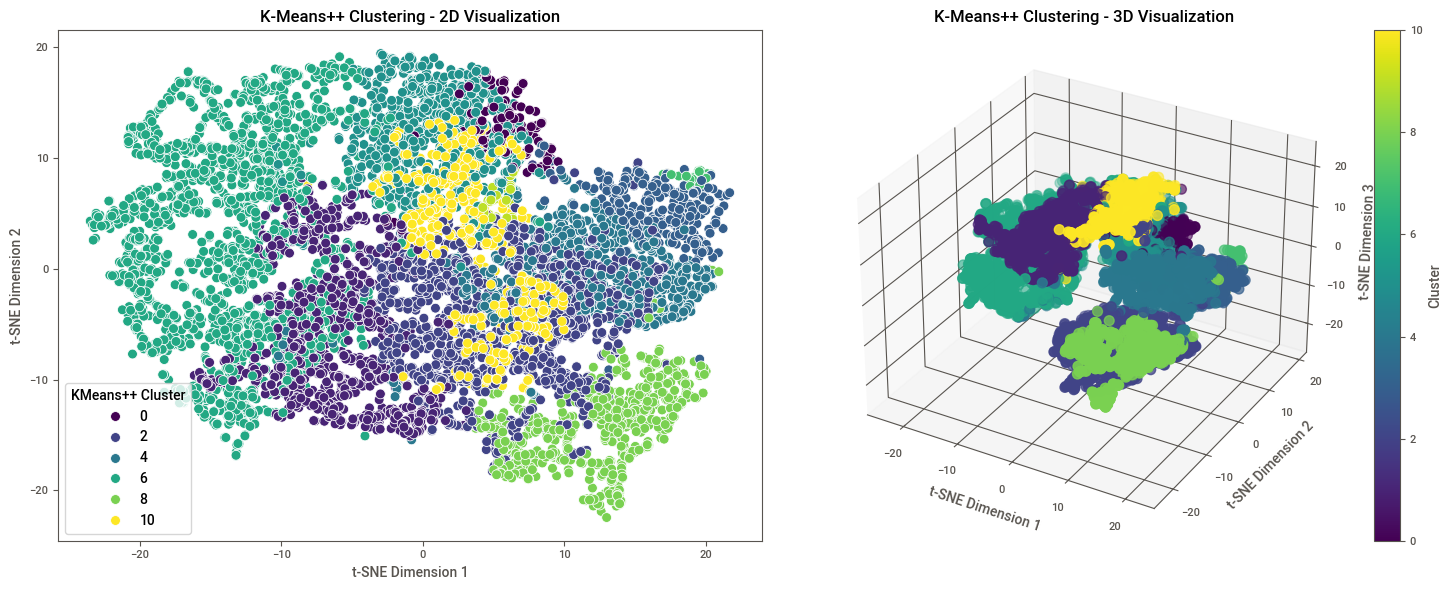

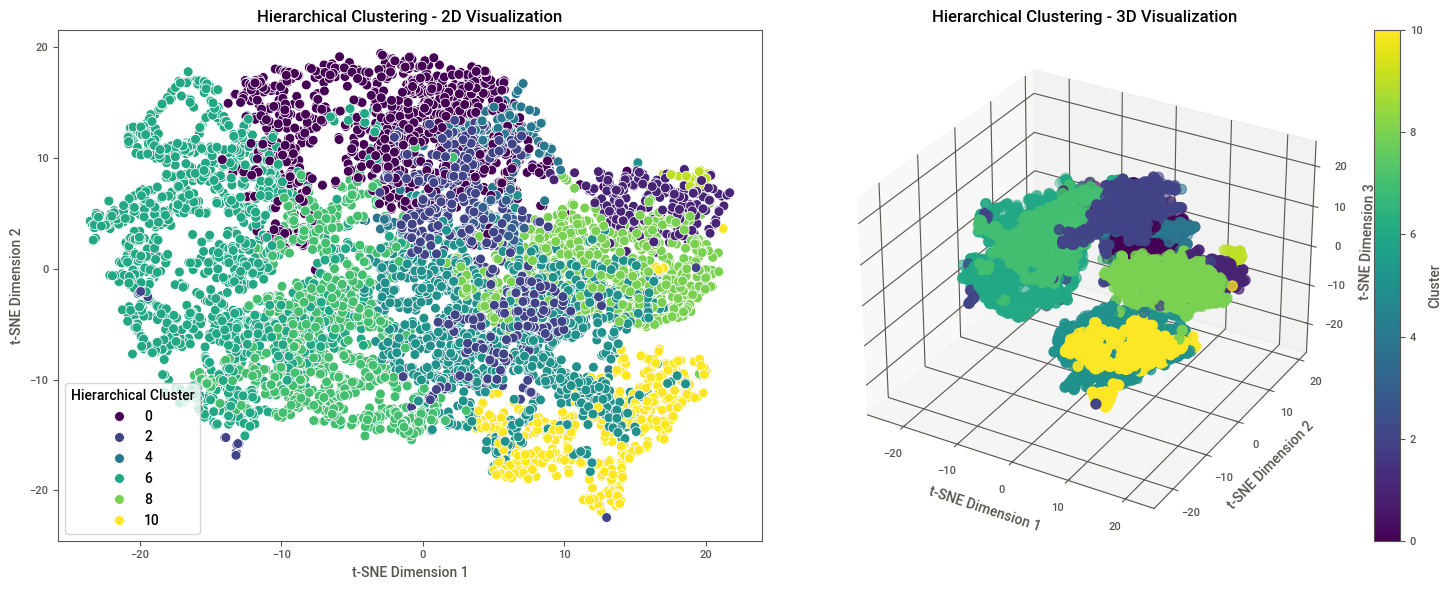

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering

# Standardize the data
scaler = StandardScaler()
pre23_scaled = scaler.fit_transform(pre23)

# K-Means++
n_clusters = 11
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
pre23['KMeans++ Cluster'] = kmeans.fit_predict(pre23_scaled)

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
pre23['Hierarchical Cluster'] = hierarchical.fit_predict(pre23_scaled)

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=3, random_state=42)
pre23_tsne_3d = tsne.fit_transform(pre23_scaled)

# Define a function to create visualizations
def plot_clusters_2d_3d(data, cluster_col, title):
    fig = plt.figure(figsize=(15, 6))

    # 2D Plot
    ax1 = fig.add_subplot(121)
    sns.scatterplot(x=data['t-SNE Dimension 1'], y=data['t-SNE Dimension 2'], hue=data[cluster_col], palette='viridis', s=50, ax=ax1)
    ax1.set_title(f'{title} - 2D Visualization')
    ax1.set_xlabel('t-SNE Dimension 1')
    ax1.set_ylabel('t-SNE Dimension 2')
    
    # 3D Plot
    ax2 = fig.add_subplot(122, projection='3d')
    scatter = ax2.scatter(data['t-SNE Dimension 1'], data['t-SNE Dimension 2'], data['t-SNE Dimension 3'],
                          c=data[cluster_col], cmap='viridis', s=50)
    ax2.set_title(f'{title} - 3D Visualization')
    ax2.set_xlabel('t-SNE Dimension 1')
    ax2.set_ylabel('t-SNE Dimension 2')
    ax2.set_zlabel('t-SNE Dimension 3')
    
    # Show color bar
    plt.colorbar(scatter, ax=ax2, label='Cluster')
    
    plt.tight_layout()
    plt.show()

# Add t-SNE dimensions to the DataFrame
pre23_tsne = pd.DataFrame(pre23_tsne_3d, columns=['t-SNE Dimension 1', 't-SNE Dimension 2', 't-SNE Dimension 3'])

# Combine t-SNE dimensions with clustering results
pre23_combined = pd.concat([pre23_tsne, pre23.reset_index(drop=True)], axis=1)

# Plot for K-Means++
plot_clusters_2d_3d(pre23_combined, 'KMeans++ Cluster', 'K-Means++ Clustering')

# Plot for Hierarchical Clustering
plot_clusters_2d_3d(pre23_combined, 'Hierarchical Cluster', 'Hierarchical Clustering')


In [40]:
# Define the number of clusters
n_clusters = 11

# K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
pre23['KMeans Cluster'] = kmeans.fit_predict(pre23_scaled)

# K-Means++
kmeans_plus = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
pre23['KMeans++ Cluster'] = kmeans_plus.fit_predict(pre23_scaled)

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
pre23['Hierarchical Cluster'] = hierarchical.fit_predict(pre23_scaled)

# Calculate evaluation metrics
metrics = {
    'Metric': ['Silhouette Score', 'Davies-Bouldin Index', 'Calinski-Harabasz Index'],
    'K-Means': [
        silhouette_score(pre23_scaled, pre23['KMeans Cluster']),
        davies_bouldin_score(pre23_scaled, pre23['KMeans Cluster']),
        calinski_harabasz_score(pre23_scaled, pre23['KMeans Cluster'])
    ],
    'K-Means++': [
        silhouette_score(pre23_scaled, pre23['KMeans++ Cluster']),
        davies_bouldin_score(pre23_scaled, pre23['KMeans++ Cluster']),
        calinski_harabasz_score(pre23_scaled, pre23['KMeans++ Cluster'])
    ],
    'Hierarchical': [
        silhouette_score(pre23_scaled, pre23['Hierarchical Cluster']),
        davies_bouldin_score(pre23_scaled, pre23['Hierarchical Cluster']),
        calinski_harabasz_score(pre23_scaled, pre23['Hierarchical Cluster'])
    ]
}

# Create a DataFrame
metrics_df = pd.DataFrame(metrics)
metrics_df.set_index('Metric', inplace=True)

# Display the table
print(metrics_df)


                             K-Means    K-Means++  Hierarchical
Metric                                                         
Silhouette Score            0.189542     0.189542      0.289284
Davies-Bouldin Index        1.579447     1.579447      1.549020
Calinski-Harabasz Index  1294.718595  1294.718595   1312.794738


In [41]:
import pandas as pd
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
pre23_scaled = scaler.fit_transform(pre23)

# Define the range of clusters
cluster_range = range(10, 16)

# Initialize an empty list to collect metrics
metrics_list = []

# Iterate through the cluster range
for n_clusters in cluster_range:
    # K-Means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    pre23['KMeans Cluster'] = kmeans.fit_predict(pre23_scaled)

    # K-Means++
    kmeans_plus = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    pre23['KMeans++ Cluster'] = kmeans_plus.fit_predict(pre23_scaled)

    # Hierarchical Clustering
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    pre23['Hierarchical Cluster'] = hierarchical.fit_predict(pre23_scaled)

    # Calculate evaluation metrics
    metrics = {
        'Number of Clusters': n_clusters,
        'K-Means Silhouette Score': silhouette_score(pre23_scaled, pre23['KMeans Cluster']),
        'K-Means Davies-Bouldin Index': davies_bouldin_score(pre23_scaled, pre23['KMeans Cluster']),
        'K-Means Calinski-Harabasz Index': calinski_harabasz_score(pre23_scaled, pre23['KMeans Cluster']),
        'K-Means++ Silhouette Score': silhouette_score(pre23_scaled, pre23['KMeans++ Cluster']),
        'K-Means++ Davies-Bouldin Index': davies_bouldin_score(pre23_scaled, pre23['KMeans++ Cluster']),
        'K-Means++ Calinski-Harabasz Index': calinski_harabasz_score(pre23_scaled, pre23['KMeans++ Cluster']),
        'Hierarchical Silhouette Score': silhouette_score(pre23_scaled, pre23['Hierarchical Cluster']),
        'Hierarchical Davies-Bouldin Index': davies_bouldin_score(pre23_scaled, pre23['Hierarchical Cluster']),
        'Hierarchical Calinski-Harabasz Index': calinski_harabasz_score(pre23_scaled, pre23['Hierarchical Cluster'])
    }

    metrics_list.append(metrics)

# Create a DataFrame from the metrics list
metrics_df = pd.DataFrame(metrics_list)

# Display the table
print(metrics_df)


   Number of Clusters  K-Means Silhouette Score  K-Means Davies-Bouldin Index  \
0                  10                  0.289593                      1.356095   
1                  11                  0.296686                      1.369548   
2                  12                  0.314528                      1.303112   
3                  13                  0.318645                      1.247438   
4                  14                  0.319477                      1.246260   
5                  15                  0.276756                      1.353396   

   K-Means Calinski-Harabasz Index  K-Means++ Silhouette Score  \
0                      1313.908116                    0.289593   
1                      1302.323302                    0.296686   
2                      1330.560030                    0.314528   
3                      1355.621865                    0.318645   
4                      1310.846185                    0.319477   
5                      1234.436484  

C:\Users\monee\AppData\Local\Temp\ipykernel_3420\2931551597.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=metrics_long, x='Number of Clusters', y='Score', hue='Method', ci=None)


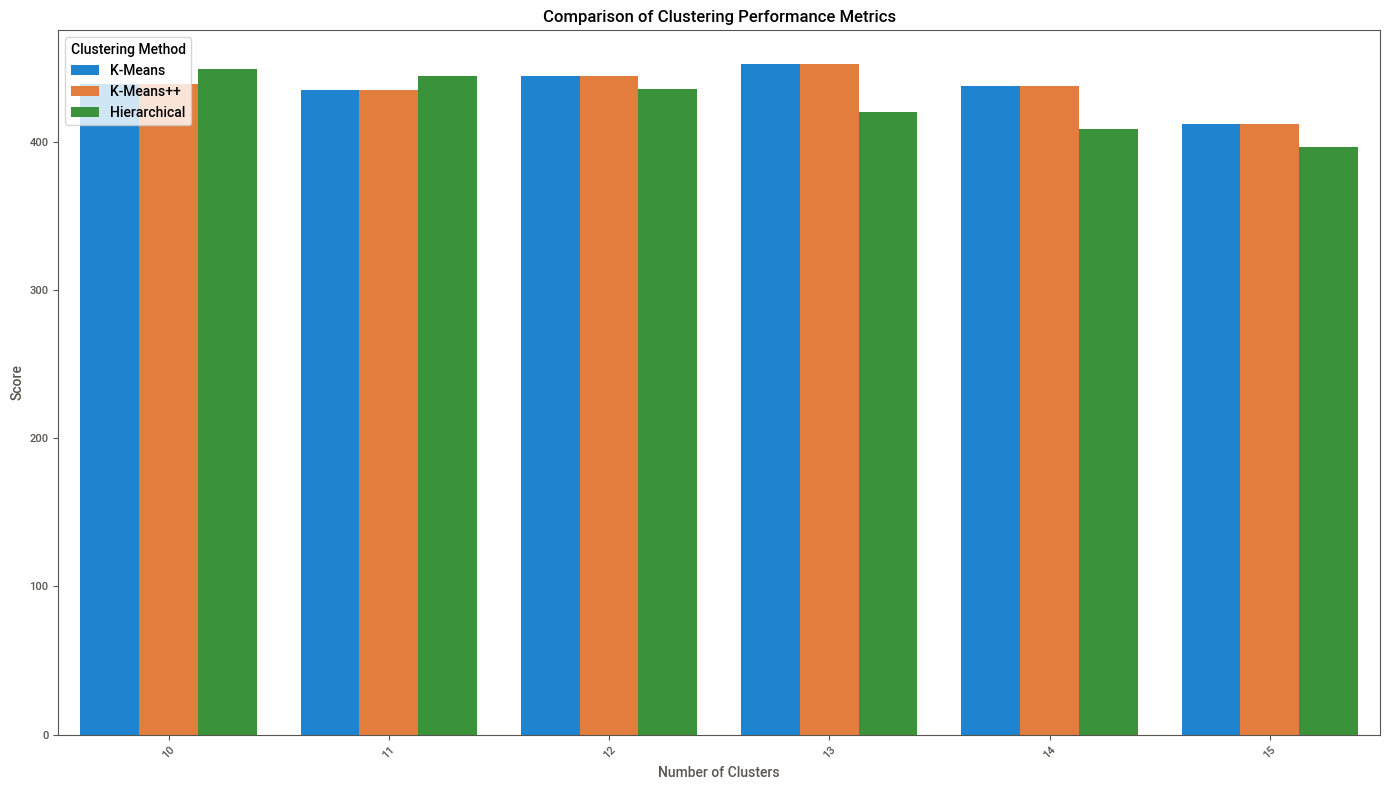

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(14, 8))

# Melt the DataFrame to long format for easier plotting
metrics_long = metrics_df.melt(id_vars='Number of Clusters', var_name='Method and Metric', value_name='Score')

# Split the 'Method and Metric' into two columns
metrics_long[['Method', 'Metric']] = metrics_long['Method and Metric'].str.split(' ', n=1, expand=True)

# Create the bar plot
sns.barplot(data=metrics_long, x='Number of Clusters', y='Score', hue='Method', ci=None)

# Customize the plot
plt.title('Comparison of Clustering Performance Metrics')
plt.ylabel('Score')
plt.xlabel('Number of Clusters')
plt.xticks(rotation=45)
plt.legend(title='Clustering Method', loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


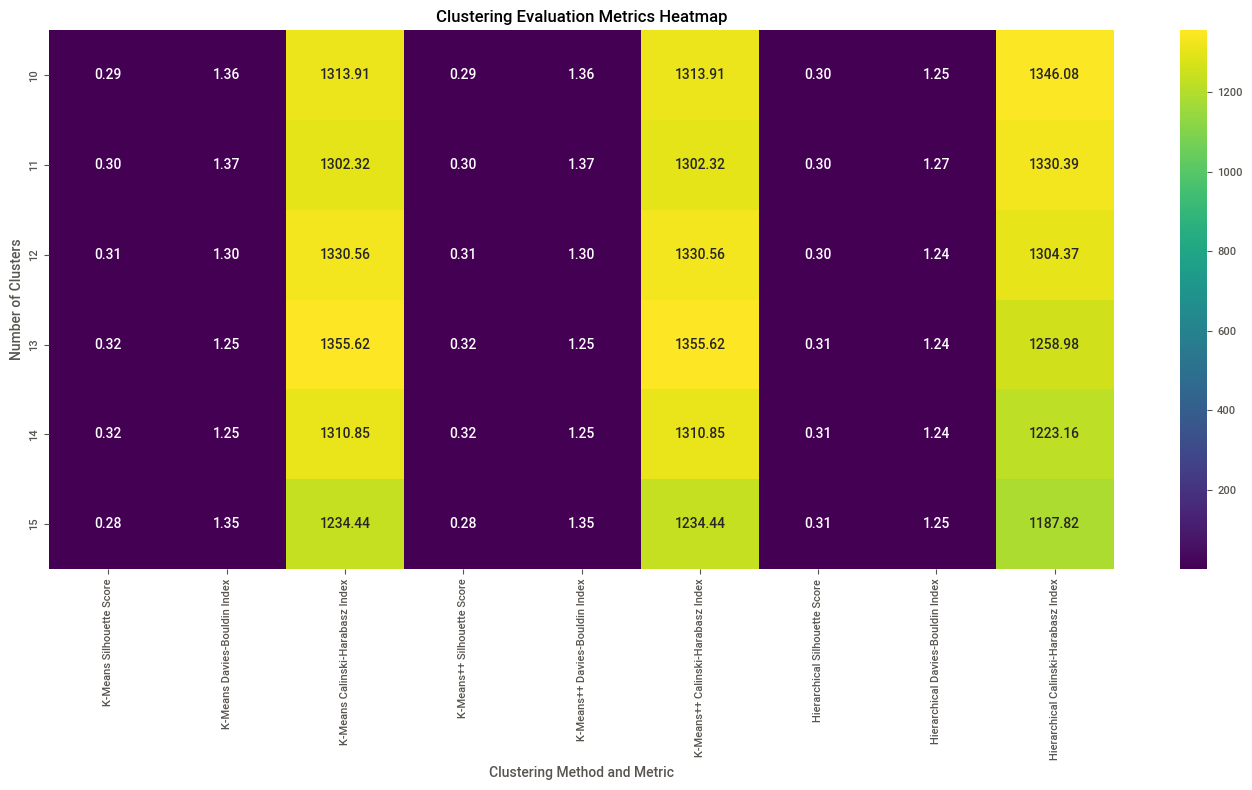

In [43]:
# Pivot the DataFrame for heatmap
heatmap_data = metrics_df.set_index('Number of Clusters')

# Create a heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='.2f')
plt.title('Clustering Evaluation Metrics Heatmap')
plt.xlabel('Clustering Method and Metric')
plt.ylabel('Number of Clusters')
plt.tight_layout()
plt.show()
